In [202]:
import warnings
warnings.filterwarnings('ignore')

from requests_html import HTML
from requests_html import HTMLSession
import pandas as pd
import urllib
from urllib.request import Request, urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re

# set up and load data, checking we've gotten it all
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keyword
import string
import collections
from collections import Counter
from nltk.corpus import stopwords
from  wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [203]:
#global varribale 
hdr = {'User-Agent': 'Mozilla/5.0'}


#c nyakundi
#url_link="https://www.cnyakundi.com/?s=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://www.cnyakundi.com";

#kahawa tungu
url_link="https://www.kahawatungu.com/?s=";
Search_keyword="Kenya Power";
match_keywords = ['kenya-power','kplc'];
domain_link="https://www.kahawatungu.com";


#daily nation
#url_link="https://nation.africa/service/search/kenya/290754?query=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://nation.africa";


#ghafla
#url_link="http://www.ghafla.com/ke/?s=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="http://www.ghafla.com/ke";


#kenyan-post
#url_link="https://kenyan-post.com/?s=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://kenyan-post.com";

#kenya-today
#url_link="https://www.kenya-today.com/?s=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://www.kenya-today.com";


#nairobiwire
#url_link="https://nairobiwire.com/?s=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://nairobiwire.com";


#kenyamoja
#url_link="https://www.kenyamoja.com/search?t=";
#Search_keyword="Kenya Power";
#match_keywords = ['kenya-power','kplc'];
#domain_link="https://www.kenyamoja.com";

In [204]:
def get_source(url):
    """Return the source code for the provided URL. 

    Args: 
        url (string): URL of the page to scrape.

    Returns:
        response (object): HTTP response object from requests_html. 
    """

    try:
        session = HTMLSession()
        response = session.get(url)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

In [205]:
def scrape_google(query):
    query = urllib.parse.quote_plus(query)
    response = get_source(url_link + query)
    links = list(response.html.absolute_links)
    return links

In [206]:
listurl=scrape_google(Search_keyword)
listurl

['https://www.kahawatungu.com/kenya-power-employees-to-strike-over-retrenchments/?share=linkedin',
 'https://www.kahawatungu.com/privacy-policy/',
 'https://www.kahawatungu.com/kenya-power-corporate-internet-packages/?share=jetpack-whatsapp',
 'https://www.kahawatungu.com/kenya-power-corporate-internet-packages/?share=facebook',
 'https://twitter.com/YOUR_USERNAME',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/?share=telegram',
 'https://www.kahawatungu.com',
 'https://www.kahawatungu.com/kenya-power-electricity-sales-mobility-companies/?share=linkedin',
 'https://www.kahawatungu.com/kenya-power-industrial-consumers-proposed-reforms/?share=twitter',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/?share=jetpack-whatsapp',
 'https://www.kahawatungu.com/kenya-power-5-managers-13-officers-grilled-over-countrywide-outages/?share=telegram',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/',
 '

In [207]:
matching = [s for s in listurl if any(xs in s for xs in match_keywords)]

matching

['https://www.kahawatungu.com/kenya-power-employees-to-strike-over-retrenchments/?share=linkedin',
 'https://www.kahawatungu.com/kenya-power-corporate-internet-packages/?share=jetpack-whatsapp',
 'https://www.kahawatungu.com/kenya-power-corporate-internet-packages/?share=facebook',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/?share=telegram',
 'https://www.kahawatungu.com/kenya-power-electricity-sales-mobility-companies/?share=linkedin',
 'https://www.kahawatungu.com/kenya-power-industrial-consumers-proposed-reforms/?share=twitter',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/?share=jetpack-whatsapp',
 'https://www.kahawatungu.com/kenya-power-5-managers-13-officers-grilled-over-countrywide-outages/?share=telegram',
 'https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/',
 'https://www.kahawatungu.com/kenya-power-industrial-consumers-proposed-reforms/',
 'https://www.kahawatungu.com/kenya-p

In [208]:
for i in range(len(matching)):
   
  final = matching[i].split('?')[0]# remove query string from url
  print(final)  

https://www.kahawatungu.com/kenya-power-employees-to-strike-over-retrenchments/
https://www.kahawatungu.com/kenya-power-corporate-internet-packages/
https://www.kahawatungu.com/kenya-power-corporate-internet-packages/
https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/
https://www.kahawatungu.com/kenya-power-electricity-sales-mobility-companies/
https://www.kahawatungu.com/kenya-power-industrial-consumers-proposed-reforms/
https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/
https://www.kahawatungu.com/kenya-power-5-managers-13-officers-grilled-over-countrywide-outages/
https://www.kahawatungu.com/10-kenya-power-officials-detained-eight-more-days/
https://www.kahawatungu.com/kenya-power-industrial-consumers-proposed-reforms/
https://www.kahawatungu.com/kenya-power-testing-internet-distribution-nairobi-two-weeks/
https://www.kahawatungu.com/kenya-power-testing-internet-distribution-nairobi-two-weeks/
https://www.kahawatungu.com/kenya-

In [209]:
#create new df 
df = pd.DataFrame({'suburl':matching})
df.head(1000)

,suburl
0,https://www.kahawatungu.com/kenya-power-employ...
1,https://www.kahawatungu.com/kenya-power-corpor...
2,https://www.kahawatungu.com/kenya-power-corpor...
3,https://www.kahawatungu.com/10-kenya-power-off...
4,https://www.kahawatungu.com/kenya-power-electr...
...,...
67,https://www.kahawatungu.com/three-kenya-power-...
68,https://www.kahawatungu.com/kenya-power-employ...
69,https://www.kahawatungu.com/6-kenya-power-empl...
70,https://www.kahawatungu.com/kenya-power-testin...


In [210]:
#ssl._create_default_https_context = ssl._create_unverified_context
#from socket import timeout

def get_page(url,headers=hdr):
    """Scrapes a URL and returns the HTML source.

    Args:
        url (string): Fully qualified URL of a page.

    Returns:
        soup (string): HTML source of scraped page.
    """

    response =Request(url, headers=headers)
    page = urlopen(response).read()
    soup = BeautifulSoup(page, 
                         'html.parser')

    return soup


soup = get_page(domain_link,headers=hdr)


In [211]:
def get_description(soup):
    """Return the meta description content

    Args:
        soup: HTML code from Beautiful Soup
        
    Returns: 
        value (string): Parsed value
    """

    if soup.findAll("meta", attrs={"name": "description"}):
        return soup.find("meta", attrs={"name": "description"}).get("content")
    else:
        return

    return

meta = get_description(soup)
#meta

In [212]:
def get_title(soup):
    """Return the page title

    Args:
        soup: HTML code from Beautiful Soup
        
    Returns: 
        value (string): Parsed value
    """

    if soup.findAll("title"):
        return soup.find("title").string
    else:
        return
   
title = get_title(soup)
#title

In [213]:
df_pages = pd.DataFrame(columns = ['title', 'description','url'])

for index, row in df.iterrows(): 

    title = get_title(soup)
    description = get_description(soup)
    soup = get_page(row['suburl'])
    
    page = {
        
        'title': title,
        'description': description,
        'url': row['suburl']
    }

    df_pages = df_pages.append(page, ignore_index=True)


In [214]:
df_pages.head(100)

,title,description,url
0,KahawaTungu - KahawaTungu,Bitter! Sweet!,https://www.kahawatungu.com/kenya-power-employ...
1,"LinkedIn Login, Sign in | LinkedIn",Login to LinkedIn to keep in touch with people...,https://www.kahawatungu.com/kenya-power-corpor...
2,Shiriki kwenye WhatsApp,WhatsApp Messenger: Zaidi ya watu bilioni 2 ka...,https://www.kahawatungu.com/kenya-power-corpor...
3,Ingia kwenye Facebook | Facebook,Ingia katika Facebook ili kuanza kusambaza na ...,https://www.kahawatungu.com/10-kenya-power-off...
4,Telegram: Share Web Page,None,https://www.kahawatungu.com/kenya-power-electr...
...,...,...,...
67,None,None,https://www.kahawatungu.com/three-kenya-power-...
68,Ingia kwenye Facebook | Facebook,Ingia katika Facebook ili kuanza kusambaza na ...,https://www.kahawatungu.com/kenya-power-employ...
69,Telegram: Share Web Page,None,https://www.kahawatungu.com/6-kenya-power-empl...
70,Ingia kwenye Facebook | Facebook,Ingia katika Facebook ili kuanza kusambaza na ...,https://www.kahawatungu.com/kenya-power-testin...


In [215]:
notnull1=df_pages[df_pages['description'].notnull()]
notnull1

,title,description,url
0,KahawaTungu - KahawaTungu,Bitter! Sweet!,https://www.kahawatungu.com/kenya-power-employ...
1,"LinkedIn Login, Sign in | LinkedIn",Login to LinkedIn to keep in touch with people...,https://www.kahawatungu.com/kenya-power-corpor...
2,Shiriki kwenye WhatsApp,WhatsApp Messenger: Zaidi ya watu bilioni 2 ka...,https://www.kahawatungu.com/kenya-power-corpor...
3,Ingia kwenye Facebook | Facebook,Ingia katika Facebook ili kuanza kusambaza na ...,https://www.kahawatungu.com/10-kenya-power-off...
5,"LinkedIn Login, Sign in | LinkedIn",Login to LinkedIn to keep in touch with people...,https://www.kahawatungu.com/kenya-power-indust...
7,Shiriki kwenye WhatsApp,WhatsApp Messenger: Zaidi ya watu bilioni 2 ka...,https://www.kahawatungu.com/kenya-power-5-mana...
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...
11,Ingia kwenye Facebook | Facebook,Ingia katika Facebook ili kuanza kusambaza na ...,https://www.kahawatungu.com/kenya-power-testin...
12,"LinkedIn Login, Sign in | LinkedIn",Login to LinkedIn to keep in touch with people...,https://www.kahawatungu.com/kenya-power-electr...


In [216]:
onlykeyword = notnull1.loc[notnull1['description'].str.contains('Kenya Power', case=False)]
onlykeyword

,title,description,url
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...
13,Kenya Power Looking to Boost Electricity Sales...,Kenya Power is engaging about five electric mo...,https://www.kahawatungu.com/kenya-power-indust...
17,"Kenya Power: 5 Managers, 13 Officers Grilled O...",18 Kenya Power staff members have been grilled...,https://www.kahawatungu.com/three-kenya-power-...
21,Kenya Power Promises Action After Reconnecting...,The Kenya Power and Lightening Company (KPLC) ...,https://www.kahawatungu.com/kenya-power-reconn...
34,Three Kenya Power Board Members Resign To Purs...,Three Kenya Power Board members have resigned....,https://www.kahawatungu.com/kenya-power-explai...
35,Kenya Power Explains Cause of Power Outage Acr...,Kenya Power has explained the cause of power o...,https://www.kahawatungu.com/kenya-power-employ...
41,Kenya Power Employees To Go on Strike Over Pla...,Employees from Kenya Power have threatened to ...,https://www.kahawatungu.com/kenya-power-indust...
48,Kenya Power Confirms Hitch Affecting Pre-paid ...,The Kenya Power and Lighting Company (KPLC) ha...,https://www.kahawatungu.com/kenya-power-confir...
58,Kenya Power to Start Testing Internet Distribu...,Kenya Power has announced the rollout of its i...,https://www.kahawatungu.com/kenya-power-corpor...


In [217]:
notnull2=onlykeyword[onlykeyword['title'].notnull()]
notnull2

,title,description,url
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...
13,Kenya Power Looking to Boost Electricity Sales...,Kenya Power is engaging about five electric mo...,https://www.kahawatungu.com/kenya-power-indust...
17,"Kenya Power: 5 Managers, 13 Officers Grilled O...",18 Kenya Power staff members have been grilled...,https://www.kahawatungu.com/three-kenya-power-...
21,Kenya Power Promises Action After Reconnecting...,The Kenya Power and Lightening Company (KPLC) ...,https://www.kahawatungu.com/kenya-power-reconn...
34,Three Kenya Power Board Members Resign To Purs...,Three Kenya Power Board members have resigned....,https://www.kahawatungu.com/kenya-power-explai...
35,Kenya Power Explains Cause of Power Outage Acr...,Kenya Power has explained the cause of power o...,https://www.kahawatungu.com/kenya-power-employ...
41,Kenya Power Employees To Go on Strike Over Pla...,Employees from Kenya Power have threatened to ...,https://www.kahawatungu.com/kenya-power-indust...
48,Kenya Power Confirms Hitch Affecting Pre-paid ...,The Kenya Power and Lighting Company (KPLC) ha...,https://www.kahawatungu.com/kenya-power-confir...
58,Kenya Power to Start Testing Internet Distribu...,Kenya Power has announced the rollout of its i...,https://www.kahawatungu.com/kenya-power-corpor...


In [218]:
df_pages1=notnull2[notnull2['description'].str.len() > 0]
df_pages1

,title,description,url
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...
13,Kenya Power Looking to Boost Electricity Sales...,Kenya Power is engaging about five electric mo...,https://www.kahawatungu.com/kenya-power-indust...
17,"Kenya Power: 5 Managers, 13 Officers Grilled O...",18 Kenya Power staff members have been grilled...,https://www.kahawatungu.com/three-kenya-power-...
21,Kenya Power Promises Action After Reconnecting...,The Kenya Power and Lightening Company (KPLC) ...,https://www.kahawatungu.com/kenya-power-reconn...
34,Three Kenya Power Board Members Resign To Purs...,Three Kenya Power Board members have resigned....,https://www.kahawatungu.com/kenya-power-explai...
35,Kenya Power Explains Cause of Power Outage Acr...,Kenya Power has explained the cause of power o...,https://www.kahawatungu.com/kenya-power-employ...
41,Kenya Power Employees To Go on Strike Over Pla...,Employees from Kenya Power have threatened to ...,https://www.kahawatungu.com/kenya-power-indust...
48,Kenya Power Confirms Hitch Affecting Pre-paid ...,The Kenya Power and Lighting Company (KPLC) ha...,https://www.kahawatungu.com/kenya-power-confir...
58,Kenya Power to Start Testing Internet Distribu...,Kenya Power has announced the rollout of its i...,https://www.kahawatungu.com/kenya-power-corpor...


In [219]:
df_pages2=df_pages1[df_pages1['title'].str.len() > 0]
df_pages2

,title,description,url
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...
13,Kenya Power Looking to Boost Electricity Sales...,Kenya Power is engaging about five electric mo...,https://www.kahawatungu.com/kenya-power-indust...
17,"Kenya Power: 5 Managers, 13 Officers Grilled O...",18 Kenya Power staff members have been grilled...,https://www.kahawatungu.com/three-kenya-power-...
21,Kenya Power Promises Action After Reconnecting...,The Kenya Power and Lightening Company (KPLC) ...,https://www.kahawatungu.com/kenya-power-reconn...
34,Three Kenya Power Board Members Resign To Purs...,Three Kenya Power Board members have resigned....,https://www.kahawatungu.com/kenya-power-explai...
35,Kenya Power Explains Cause of Power Outage Acr...,Kenya Power has explained the cause of power o...,https://www.kahawatungu.com/kenya-power-employ...
41,Kenya Power Employees To Go on Strike Over Pla...,Employees from Kenya Power have threatened to ...,https://www.kahawatungu.com/kenya-power-indust...
48,Kenya Power Confirms Hitch Affecting Pre-paid ...,The Kenya Power and Lighting Company (KPLC) ha...,https://www.kahawatungu.com/kenya-power-confir...
58,Kenya Power to Start Testing Internet Distribu...,Kenya Power has announced the rollout of its i...,https://www.kahawatungu.com/kenya-power-corpor...


In [220]:
#remove punctuation and converts all the text to lower cas
def clean_text(df_pages2):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", df_pages2.lower())
    return re.sub(r'\W+', ' ', clean1)

In [221]:
#create a new column in our dataframe with the cleaned up text
df_pages2['tokenized'] = df_pages2['description'].map(lambda x: clean_text(x))
display(df_pages2.head(n=1000))

,title,description,url,tokenized
9,10 Kenya Power Officials Detained for Eight Mo...,Ten Kenya Power company officials have been de...,https://www.kahawatungu.com/kenya-power-indust...,ten kenya power company officials have been de...
10,Kenya Power to Focus on Industrial Consumers i...,Kenya Power will soon start distributing energ...,https://www.kahawatungu.com/kenya-power-testin...,kenya power will soon start distributing energ...
13,Kenya Power Looking to Boost Electricity Sales...,Kenya Power is engaging about five electric mo...,https://www.kahawatungu.com/kenya-power-indust...,kenya power is engaging about five electric mo...
17,"Kenya Power: 5 Managers, 13 Officers Grilled O...",18 Kenya Power staff members have been grilled...,https://www.kahawatungu.com/three-kenya-power-...,18 kenya power staff members have been grilled...
21,Kenya Power Promises Action After Reconnecting...,The Kenya Power and Lightening Company (KPLC) ...,https://www.kahawatungu.com/kenya-power-reconn...,the kenya power and lightening company kplc ha...
34,Three Kenya Power Board Members Resign To Purs...,Three Kenya Power Board members have resigned....,https://www.kahawatungu.com/kenya-power-explai...,three kenya power board members have resignedt...
35,Kenya Power Explains Cause of Power Outage Acr...,Kenya Power has explained the cause of power o...,https://www.kahawatungu.com/kenya-power-employ...,kenya power has explained the cause of power o...
41,Kenya Power Employees To Go on Strike Over Pla...,Employees from Kenya Power have threatened to ...,https://www.kahawatungu.com/kenya-power-indust...,employees from kenya power have threatened to ...
48,Kenya Power Confirms Hitch Affecting Pre-paid ...,The Kenya Power and Lighting Company (KPLC) ha...,https://www.kahawatungu.com/kenya-power-confir...,the kenya power and lighting company kplc has ...
58,Kenya Power to Start Testing Internet Distribu...,Kenya Power has announced the rollout of its i...,https://www.kahawatungu.com/kenya-power-corpor...,kenya power has announced the rollout of its i...


In [222]:
#removing pages with zero words and the mean number of words per page
df_pages2['num_wds'] = df_pages2['tokenized'].apply(lambda x: len(x.split()))
len(df_pages2[df_pages2['num_wds']==0])
df_pages2 = df_pages2[df_pages2['num_wds']>0]
final_df_pages=df_pages2[df_pages2['num_wds']>0]
df_pages2['num_wds'].mean()
df_pages2['num_wds'].min()

17

In [223]:
#now lets start text analysis, create set first
set('b ac b'.split())
#add result as  a new column that contains the number of unique words in each pages
df_pages2['uniq_wds'] = df_pages2['tokenized'].str.split().apply(lambda x: len(set(x)))
df_pages2['uniq_wds'].head()

9     21
10    20
13    22
17    16
21    17
Name: uniq_wds, dtype: int64

In [224]:
#most common words over the entire corpus common  in english
wd_counts = Counter()
for i, row in df_pages2.iterrows():
    wd_counts.update(row['tokenized'].split())
    stopwords.words('english')

In [225]:
# delete the stopwords from our Counter
for sw in stopwords.words('english'):
    del wd_counts[sw]
    
#most commonly-used words  using the most_common function
wd_counts.most_common(20)

[('power', 16),
 ('kenya', 12),
 ('company', 5),
 ('set', 3),
 ('country', 3),
 ('outage', 3),
 ('start', 2),
 ('distributing', 2),
 ('staff', 2),
 ('members', 2),
 ('kplc', 2),
 ('employees', 2),
 ('announced', 2),
 ('internet', 2),
 ('ten', 1),
 ('officials', 1),
 ('detained', 1),
 ('eight', 1),
 ('daythe', 1),
 ('suspects', 1)]

In [226]:
#Step 4 integrate sample data to create text corpus
print(df_pages2['tokenized']);

text_corpus=["".join(text) for text in df_pages2['tokenized']]
final_text_corpus=" ".join(text_corpus)
print(final_text_corpus)

9     ten kenya power company officials have been de...
10    kenya power will soon start distributing energ...
13    kenya power is engaging about five electric mo...
17    18 kenya power staff members have been grilled...
21    the kenya power and lightening company kplc ha...
34    three kenya power board members have resignedt...
35    kenya power has explained the cause of power o...
41    employees from kenya power have threatened to ...
48    the kenya power and lighting company kplc has ...
58    kenya power has announced the rollout of its i...
60    kenya power is set to start distributing high ...
64    six kenya power employees have been released u...
Name: tokenized, dtype: object
ten kenya power company officials have been detained for eight more daythe suspects were arrested on tuesday in connection with claims kenya power will soon start distributing energy to only large commercial and industrial consumers in the latest reforms the ministry of kenya power is engaging ab

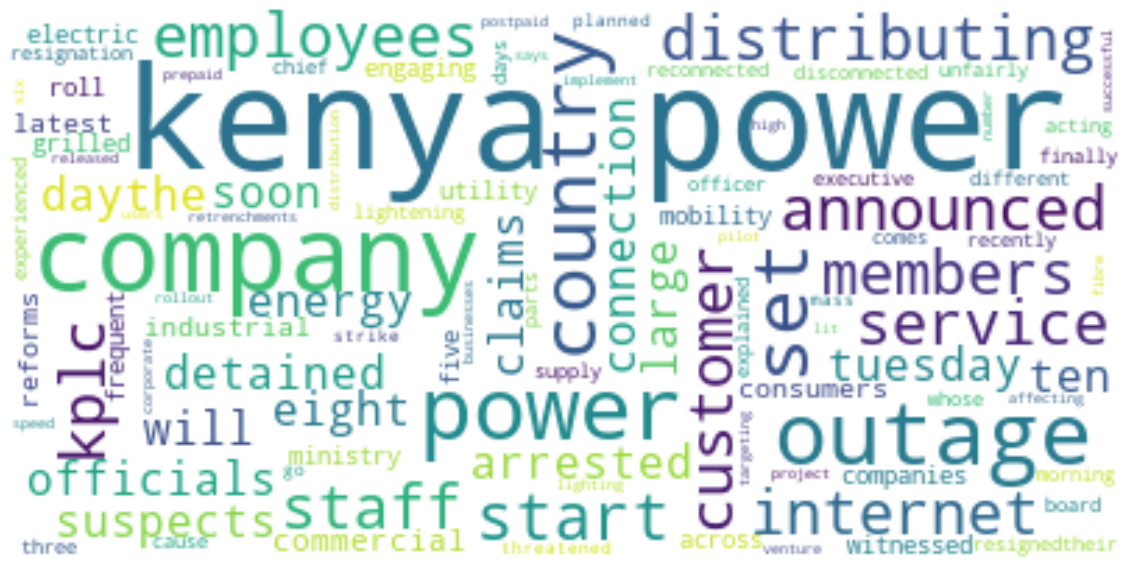

In [227]:
#applying and ploting  word cloud text analysis technique
adf_pages1=WordCloud(background_color="white").generate(final_text_corpus)
plt.figure(figsize=(20,20))
plt.imshow(adf_pages1,interpolation='bilinear')
plt.axis('off')
plt.show()